In [2]:
#Load libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_16612\3070330209.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
counts = pd.read_csv('C:/Users/user/Downloads/2117ensemble.csv')

In [4]:
counts = counts.transpose()
counts.columns = counts.iloc[0] 
counts = counts.drop(counts.index[0])
counts = counts.astype(float)

In [15]:
counts.head()

Tags,ENSG00000227232,ENSG00000279457,ENSG00000228463,ENSG00000225630,ENSG00000237973,ENSG00000248527,ENSG00000228327,ENSG00000237491,ENSG00000230092,ENSG00000177757,...,ENSG00000198727,ENSG00000210196,ENSG00000277400,ENSG00000276256,ENSG00000273748,ENSG00000278817,ENSG00000278384,ENSG00000276345,ENSG00000271254,ENSG00000275405
T2D_CTL_12h_i05,17.0,49.0,9.0,4.0,40.0,57.0,14.0,26.0,6.0,48.0,...,827.0,1044.0,4.0,262.0,147.0,45.0,26.0,54.0,446.0,20.0
T2D_CTL_18h_i05,11.0,21.0,7.0,4.0,27.0,66.0,5.0,7.0,10.0,26.0,...,715.0,697.0,3.0,99.0,51.0,29.0,9.0,24.0,174.0,13.0
T2D_CTL_24h_i05,13.0,25.0,3.0,7.0,38.0,60.0,13.0,26.0,2.0,27.0,...,798.0,780.0,1.0,151.0,66.0,24.0,22.0,15.0,264.0,8.0
T2D_CTL_30h_i05,28.0,42.0,11.0,12.0,48.0,76.0,29.0,17.0,8.0,66.0,...,985.0,1003.0,7.0,205.0,113.0,60.0,28.0,37.0,469.0,19.0
T2D_CTL_36h_i05,28.0,43.0,10.0,1.0,25.0,41.0,18.0,16.0,7.0,60.0,...,761.0,799.0,3.0,127.0,106.0,31.0,14.0,21.0,367.0,4.0


In [5]:
sample = pd.read_csv('c:/Users/user/Downloads/clin2117.csv')

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
sample['Label']=labelencoder.fit_transform(sample.iloc[:,3].values)

In [7]:
#  split data for train and test
y =  sample['Label']
X_train, X_test, y_train, y_test = train_test_split(counts,
                                                    y,
                                                    test_size = 0.3,random_state=132)
                                                
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (130, 18482)
X_test shape (56, 18482)


In [8]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=2, random_state=42)  #

# train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


bincount prediction: [33 23]


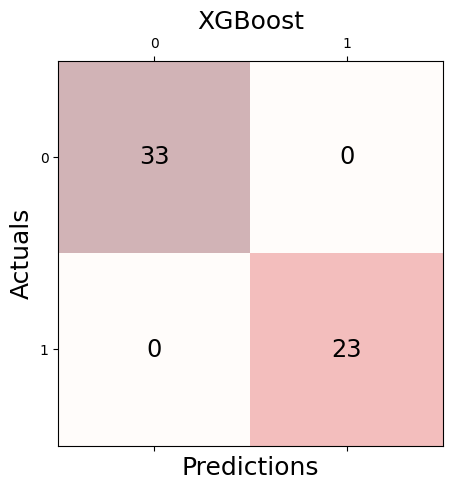

In [ ]:
preds = xgb_classifier.predict(X_test)
prediction =[]
for i in preds:
    if i >=0.5:
        prediction.append(1)
    else:
        prediction.append(0)
print("bincount prediction:", np.bincount(prediction))
conf_matrix = confusion_matrix(y_true = y_test, y_pred=prediction)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('XGBoost', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#true positives, false negatives, true negatives, and false positives
tn, fp, fn, tp = cm.ravel()

# sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 1.0
Specificity: 1.0


In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 1.000
F1 Score: 1.000
Precision: 1.000
Recall: 1.000
